# Introduction

# Scientific Question: The protein Tau has several isoforms, how do they differ by their protein sequences using a BLAST search and pairwise sequence alignment?

Protein Tau is universally known as one of the main factors of dementia and Alzheimer's disease (AD). The abnormally hyperphosphorylated form of tau is seen in all the diseases. Inhibiting the tau abnormality shows promise to therapeutic approaches to Alzheimer’s disease. (Khalid Iqbal, et al. 2005)

This protein influences dementia and AD through its various forms and there has not been enough study on how those changes of isoforms effect dementia and AD. In AD, it appears that ß-amyloid peptide (Aß) plays a pivotal role in triggering the imbalance of the activities of different protein kinases and phosphatases from tau (Medeiros, Rodrigo et al.)

Khalid Iqbal, et al. “Tau pathology in Alzheimer disease and other tauopathies”, Biochimica et Biophysica Acta (BBA) - Molecular Basis of Disease, Volume 1739, Issues 2–3, 2005, Pages 198-210, ISSN 0925-4439, https://doi.org/10.1016/j.bbadis.2004.09.008

Medeiros, Rodrigo et al. “The role of tau in Alzheimer's disease and related disorders.” CNS neuroscience & therapeutics vol. 17,5 (2011): 514-24. doi:10.1111/j.1755-5949.2010.00177.x 



# Scientific Hypothesis: If all protein tau isoforms are causes of Alzheimer's disease, then comparing the sequence of an isoform with another through a BLAST search will result in several different regions of similarity.

The NCBI data libray has documented 11 isoforms of protein tau. Based off of the numbered isoforms, we chose number 1 to be our test subject in comparison with another isoform. To find an isoform in comparison however, required a BLAST search that allows the isoform to identify the most similar isoform sequence to itself. The BLAST search was done as a protein BLAST, with the database as refseq selecting proteins, with the top 2 hits shown. Once the search was done, isoform 9 was the top resulting sequence with the highest similarity with isoform 1. 

Comparing these two sequences with pairwise sequence alignment would be able to analyze how similar the sequences are with the scoring method and we can use a dotplot to visualize the correlation between the two isoforms. Dotplots displays the changes between two or more objects. 

To test my hypothesis, the sequence of tau isoform 1 was used in a BLAST search to find tau isoform 9 which led to a pairwise sequence alignment between the two to compare the sequences. A dotplot was used after to visualize the comparison. 

# Loading in Packages

Pandas: One of the most used packages within the Python community, this package is able to analyze data and create data frames that consists of rows and columns. Most data is taken from a CSV, SQL, or other types of files. Pandas is mainly used to create lists and disctionaries as looping through a code is more simple with the use of pandas.
https://pandas.pydata.org/about/index.html

Numpy: Numpy is used as a open source to enable numerical computing with Python. This package consists of many dimensinal arrays, numerical computing tools, and supports other hardware and computing platforms. The numpy vectorization, indexing, and broadcasting concepts are the main standard of array computing today. 
https://numpy.org/

Matplotlib: This package is a plottling library for Python and has a numerical extension of numpy. This library is known to be a comprehensive library for creating static, animated, and interactive visualizations in Python. 
https://matplotlib.org/

In [1]:
conda install -c bioconda pandas

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
conda install -c bioconda numpy

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
conda install -c bioconda matplotlib

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Bio import pairwise2
from Bio import SeqIO
from Bio.Seq import Seq 
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML
from itertools import combinations

# Performing Bioinformatics Analysis

BLAST Search: This Basic Local Alignment Search Tool (BLAST) finds regions of similarity between biological sequences. In this project, a protein search was executed to compare the first tau isoform sequence to another isoform of highest similarity through the calculation of statistical significance. 
https://blast.ncbi.nlm.nih.gov/Blast.cgi

In [5]:
# opens the sequence file which imports NCBI BLAST for search
# define global variable sequence_data to store isoform 1 sequence
sequence_data = open("tauisoform1.fasta").read()

In [6]:
# output the sequence file of tau isoform 1
sequence_data

'>NP_058519.3 microtubule-associated protein tau isoform 1 [Homo sapiens]\nMAEPRQEFEVMEDHAGTYGLGDRKDQGGYTMHQDQEGDTDAGLKESPLQTPTEDGSEEPGSETSDAKSTP\nTAEDVTAPLVDEGAPGKQAAAQPHTEIPEGTTAEEAGIGDTPSLEDEAAGHVTQEPESGKVVQEGFLREP\nGPPGLSHQLMSGMPGAPLLPEGPREATRQPSGTGPEDTEGGRHAPELLKHQLLGDLHQEGPPLKGAGGKE\nRPGSKEEVDEDRDVDESSPQDSPPSKASPAQDGRPPQTAAREATSIPGFPAEGAIPLPVDFLSKVSTEIP\nASEPDGPSVGRAKGQDAPLEFTFHVEITPNVQKEQAHSEEHLGRAAFPGAPGEGPEARGPSLGEDTKEAD\nLPEPSEKQPAAAPRGKPVSRVPQLKARMVSKSKDGTGSDDKKAKTSTRSSAKTLKNRPCLSPKHPTPGSS\nDPLIQPSSPAVCPEPPSSPKYVSSVTSRTGSSGAKEMKLKGADGKTKIATPRGAAPPGQKGQANATRIPA\nKTPPAPKTPPSSGEPPKSGDRSGYSSPGSPGTPGSRSRTPSLPTPPTREPKKVAVVRTPPKSPSSAKSRL\nQTAPVPMPDLKNVKSKIGSTENLKHQPGGGKVQIINKKLDLSNVQSKCGSKDNIKHVPGGGSVQIVYKPV\nDLSKVTSKCGSLGNIHHKPGGGQVEVKSEKLDFKDRVQSKIGSLDNITHVPGGGNKKIETHKLTFRENAK\nAKTDHGAEIVYKSPVVSGDTSPRHLSNVSSTGSIDMVDSPQLATLADEVSASLAKQGL\n\n'

In [7]:
# calls the qblast function as main parameter
# define global variable result_handle to store BLAST search output
# database is (refseq_select_prot) and internal program is (blastp)
# print to check the result

result_handle = NCBIWWW.qblast("blastp", "refseq_select_prot", sequence_data,
                               hitlist_size = 2)
print(result_handle)

In [8]:
# define global variable save_file to open a new xml file for results
# create a file to add the results of the BLAST search
# XML file works the best in this scenario as it can be used to add and remove data to be used later
# reading the file checks to make sure the results has been added into the XML file
save_file = open("results.xml", "w")
save_file.write(result_handle.read())

8707

In [9]:
# define global variable E_VALUE_THRESH to specify the results of BLAST search by E value
# open the file using NCBIXML parse method
# use for loop to get top 2 results from BLAST search, (in this case each isoform had 2 sections of similarity) 
# the third and fourth result was from mice, a result to disregard
E_VALUE_THRESH = 1e-20
for record in NCBIXML.parse(open("results.xml")):
    if record.alignments:
        print("\n")
        print("query: %s" % record.query[:100])
        for align in record.alignments:
            for hsp in align.hsps:
                if hsp.expect < E_VALUE_THRESH:
                    print("match: %s" % align.title[:100])



query: NP_058519.3 microtubule-associated protein tau isoform 1 [Homo sapiens]
match: gi|1786986091|ref|NP_001364194.1| microtubule-associated protein tau isoform 9 [Homo sapiens]
match: gi|1786986091|ref|NP_001364194.1| microtubule-associated protein tau isoform 9 [Homo sapiens]
match: gi|84370347|ref|NP_001033698.1| microtubule-associated protein tau isoform a [Mus musculus]
match: gi|84370347|ref|NP_001033698.1| microtubule-associated protein tau isoform a [Mus musculus]


Pairwise Sequence Alignment: To identify regions of similarity between two different biological sequences, pariwise sequence alignment is used to indicate functional, structural, or evolutionary relationships. The results of this analysis conclude with a score of what matches or mismatches between the sequences. Global and local alignment are the two types of pairwise sequence alignment, where one uses the entirety of the sequence and the other only uses the regions of higher similarity. 
https://www.ebi.ac.uk/Tools/psa/

In [10]:
# define global variable sequence to parse both sequences from one fasta file
# print out the two isoform sequences
# use a for loop to print out both sequences from one file
sequence = SeqIO.parse("mult_seq.fasta", "fasta")
print(type(sequence))
print(sequence)
for s in sequence:
    print(type(s))
    print(s)

<class 'Bio.SeqIO.FastaIO.FastaIterator'>
<class 'Bio.SeqRecord.SeqRecord'>
ID: NP_058519.3
Name: NP_058519.3
Description: NP_058519.3 microtubule-associated protein tau isoform 1 [Homo sapiens]
Number of features: 0
Seq('MAEPRQEFEVMEDHAGTYGLGDRKDQGGYTMHQDQEGDTDAGLKESPLQTPTED...QGL')
<class 'Bio.SeqRecord.SeqRecord'>
ID: NP_001364194.1
Name: NP_001364194.1
Description: NP_001364194.1 microtubule-associated protein tau isoform 9 [Homo sapiens]
Number of features: 0
Seq('MAEPRQEFEVMEDHAGTYGLGDRKDQGGYTMHQDQEGDTDAGLKESPLQTPTED...QGL')


In [11]:
# define function of scoring of pairwise sequence alignment

def score(sequence1, sequence2):
    a = 0
    for pos in range(0, min(len(sequence1), len(sequence2))):
        if sequence1[pos] == sequence2[pos]:
            a += 2
        if sequence1[pos] != sequence2[pos]:
            a += -1
        if sequence1[pos] == sequence2[pos] == '-':
            a += -2
    return a

# this is comparing the two sequences using the score that was created above
# define local variable seq_records to parse file inputted from definition
# define local variable array to create a new array for result
# for loop to run through the file inputted
# define local variable sequence1 as the first sequence from the file
# define local variable sequence2 as the second sequence from the file
# print both sequences and score

def sequence_compare(file):
    seq_records = SeqIO.parse(file, "fasta")
    array = np.empty(1, int)
    for record1, record2 in combinations(seq_records, 2):
        sequence1 = record1.seq
        sequence2 = record2.seq
        a = score(sequence1, sequence2)
        array = np.append(array, [a], axis = 0)
        print(sequence1)
        print(sequence2)
        print(a)

sequence_compare("mult_seq.fasta")

MAEPRQEFEVMEDHAGTYGLGDRKDQGGYTMHQDQEGDTDAGLKESPLQTPTEDGSEEPGSETSDAKSTPTAEDVTAPLVDEGAPGKQAAAQPHTEIPEGTTAEEAGIGDTPSLEDEAAGHVTQEPESGKVVQEGFLREPGPPGLSHQLMSGMPGAPLLPEGPREATRQPSGTGPEDTEGGRHAPELLKHQLLGDLHQEGPPLKGAGGKERPGSKEEVDEDRDVDESSPQDSPPSKASPAQDGRPPQTAAREATSIPGFPAEGAIPLPVDFLSKVSTEIPASEPDGPSVGRAKGQDAPLEFTFHVEITPNVQKEQAHSEEHLGRAAFPGAPGEGPEARGPSLGEDTKEADLPEPSEKQPAAAPRGKPVSRVPQLKARMVSKSKDGTGSDDKKAKTSTRSSAKTLKNRPCLSPKHPTPGSSDPLIQPSSPAVCPEPPSSPKYVSSVTSRTGSSGAKEMKLKGADGKTKIATPRGAAPPGQKGQANATRIPAKTPPAPKTPPSSGEPPKSGDRSGYSSPGSPGTPGSRSRTPSLPTPPTREPKKVAVVRTPPKSPSSAKSRLQTAPVPMPDLKNVKSKIGSTENLKHQPGGGKVQIINKKLDLSNVQSKCGSKDNIKHVPGGGSVQIVYKPVDLSKVTSKCGSLGNIHHKPGGGQVEVKSEKLDFKDRVQSKIGSLDNITHVPGGGNKKIETHKLTFRENAKAKTDHGAEIVYKSPVVSGDTSPRHLSNVSSTGSIDMVDSPQLATLADEVSASLAKQGL
MAEPRQEFEVMEDHAGTYGLGDRKDQGGYTMHQDQEGDTDAGLKESPLQTPTEDGSEEPGSETSDAKSTPTAEAEEAGIGDTPSLEDEAAGHVTQEELRVPGRQRKAPERPLANEISAHVQPGPCGEASGVSGPCLGEKEPEAPVPLTASLPQHRPVCPAPPPTGGPQEPSLEWGQKGGDWAEKGPAFPKPATTAYLHTEPESGKVVQEGFLREPGPPGLSHQLMSGMPGAPLLPEGPREA

# Plotting the Results

Dot Plots: Using the matplotlib package, a dot plot can be made. It is a statistical chart consisting of dots to compare two objects and display the differences. A dot plot can clearly visualize the regions of difference, where that analysis can bring conclusions to the study. 
https://plotly.com/python/dot-plots/

In [12]:
# Define global variable Fasta to parse a list of both sequences from fasta file
# Define global variable isoform1 to store the first item on list as first sequence
# print the isoform

Fasta = list(SeqIO.parse("mult_seq.fasta", "fasta"))
isoform1 = Fasta[0].seq
print(isoform1)

MAEPRQEFEVMEDHAGTYGLGDRKDQGGYTMHQDQEGDTDAGLKESPLQTPTEDGSEEPGSETSDAKSTPTAEDVTAPLVDEGAPGKQAAAQPHTEIPEGTTAEEAGIGDTPSLEDEAAGHVTQEPESGKVVQEGFLREPGPPGLSHQLMSGMPGAPLLPEGPREATRQPSGTGPEDTEGGRHAPELLKHQLLGDLHQEGPPLKGAGGKERPGSKEEVDEDRDVDESSPQDSPPSKASPAQDGRPPQTAAREATSIPGFPAEGAIPLPVDFLSKVSTEIPASEPDGPSVGRAKGQDAPLEFTFHVEITPNVQKEQAHSEEHLGRAAFPGAPGEGPEARGPSLGEDTKEADLPEPSEKQPAAAPRGKPVSRVPQLKARMVSKSKDGTGSDDKKAKTSTRSSAKTLKNRPCLSPKHPTPGSSDPLIQPSSPAVCPEPPSSPKYVSSVTSRTGSSGAKEMKLKGADGKTKIATPRGAAPPGQKGQANATRIPAKTPPAPKTPPSSGEPPKSGDRSGYSSPGSPGTPGSRSRTPSLPTPPTREPKKVAVVRTPPKSPSSAKSRLQTAPVPMPDLKNVKSKIGSTENLKHQPGGGKVQIINKKLDLSNVQSKCGSKDNIKHVPGGGSVQIVYKPVDLSKVTSKCGSLGNIHHKPGGGQVEVKSEKLDFKDRVQSKIGSLDNITHVPGGGNKKIETHKLTFRENAKAKTDHGAEIVYKSPVVSGDTSPRHLSNVSSTGSIDMVDSPQLATLADEVSASLAKQGL


In [13]:
# Define global variable BLAST_hit as the resulting isoform from the BLAST search above, tau isoform 9
# BLAST_hit takes the second item on the Fasta list 
# print BLAST_hit

BLAST_hit = Fasta[1].seq
print(BLAST_hit)

MAEPRQEFEVMEDHAGTYGLGDRKDQGGYTMHQDQEGDTDAGLKESPLQTPTEDGSEEPGSETSDAKSTPTAEAEEAGIGDTPSLEDEAAGHVTQEELRVPGRQRKAPERPLANEISAHVQPGPCGEASGVSGPCLGEKEPEAPVPLTASLPQHRPVCPAPPPTGGPQEPSLEWGQKGGDWAEKGPAFPKPATTAYLHTEPESGKVVQEGFLREPGPPGLSHQLMSGMPGAPLLPEGPREATRQPSGTGPEDTEGGRHAPELLKHQLLGDLHQEGPPLKGAGGKERPGSKEEVDEDRDVDESSPQDSPPSKASPAQDGRPPQTAAREATSIPGFPAEGAIPLPVDFLSKVSTEIPASEPDGPSVGRAKGQDAPLEFTFHVEITPNVQKEQAHSEEHLGRAAFPGAPGEGPEARGPSLGEDTKEADLPEPSEKQPAAAPRGKPVSRVPQLKARMVSKSKDGTGSDDKKAKTSTRSSAKTLKNRPCLSPKHPTPGSSDPLIQPSSPAVCPEPPSSPKYVSSVTSRTGSSGAKEMKLKGADGKTKIATPRGAAPPGQKGQANATRIPAKTPPAPKTPPSSGEPPKSGDRSGYSSPGSPGTPGSRSRTPSLPTPPTREPKKVAVVRTPPKSPSSAKSRLQTAPVPMPDLKNVKSKIGSTENLKHQPGGGKVQIINKKLDLSNVQSKCGSKDNIKHVPGGGSVQIVYKPVDLSKVTSKCGSLGNIHHKPGGGQVEVKSEKLDFKDRVQSKIGSLDNITHVPGGGNKKIETHKLTFRENAKAKTDHGAEIVYKSPVVSGDTSPRHLSNVSSTGSIDMVDSPQLATLADEVSASLAKQGL


In [14]:
# Setting the window size and which sequence is on the x and y axes of the dot plot

window = 3
seq_one = str(isoform1)
seq_two = str(BLAST_hit)

# Saving the data in the dot plot based on window size and comparing for all I and all j in the range of the lengths of the
# sequences, wheter or not there is an alignment.

data = [
    [
        (seq_one[i : i + window] != seq_two[j: j + window])
        for j in range(len(seq_one) - window)
    ]
    for i in range(len(seq_two) - window)
]

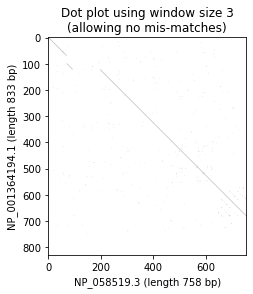

In [15]:
# label the graph and display the graph

import pylab

pylab.gray()
pylab.imshow(data)
pylab.xlabel("%s (length %i bp)" % (Fasta[0].id, len(Fasta[0].seq)))
pylab.ylabel("%s (length %i bp)" % (Fasta[1].id, len(Fasta[1].seq)))
pylab.title("Dot plot using window size %i\n(allowing no mis-matches)" % window)
pylab.show()

# Analysis

The resulting dot plot shows the protein sequence relationship between protein tau isoform 1 (x-axis) and protein tau isoform 9 (y-axis). We can see a few gray lines within the graph representing the similar regions of the two isoforms. Although not a perfectly straight line, this visualization shows the specific regions the isoforms are similar. As different isoforms, we do not expect the sequences to be exactly similar thus making my hypothesis correct. There are three specific regions of these two isoforms that are similar but there are other portions of the sequences where they do not line up. The tau isoforms are not necessarily the cause of AD, but more a precursor to hyperphosphorylation which leads to AD. Figuring out the patterns of the different isoforms can help in the advancement for the cure of dementia and AD. This procedure can be used for the remaining isoforms and thus can be compared to see any patterns of similarity. 